In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('advertising.csv')
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='TV'>

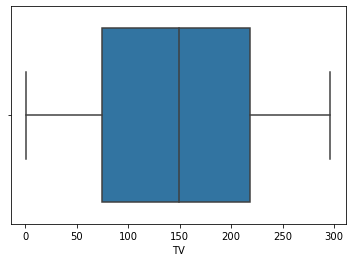

In [8]:
sns.boxplot(data['TV'])

<AxesSubplot:xlabel='Radio'>

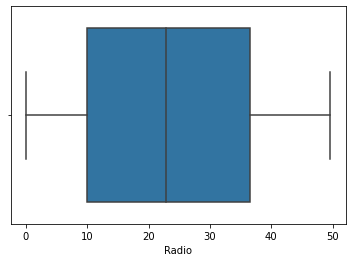

In [9]:
sns.boxplot(data['Radio'])

<AxesSubplot:xlabel='Newspaper'>

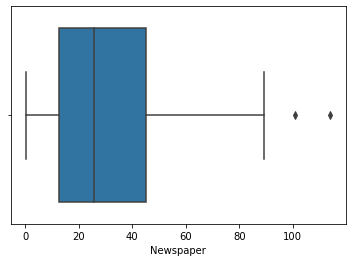

In [10]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

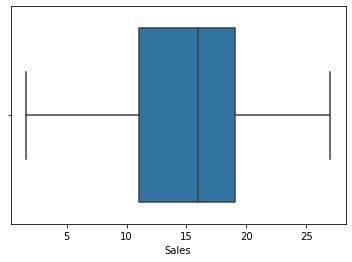

In [11]:
sns.boxplot(data['Sales'])

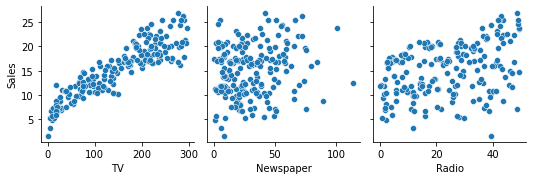

In [13]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')

<AxesSubplot:>

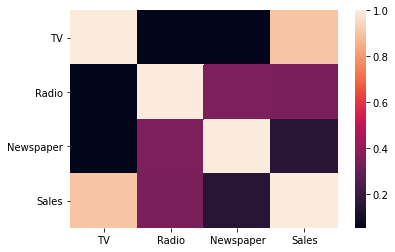

In [14]:
sns.heatmap(data.corr())

In [15]:
X = np.array(data.drop(["Sales"],axis=1))
Y = np.array(data["Sales"])

In [16]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
#model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ypred = model.predict(xtest)

In [19]:
res = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(res)

    Predicted Sales
0         17.034772
1         20.409740
2         23.723989
3          9.272785
4         21.682719
5         12.569402
6         21.081195
7          8.690350
8         17.237013
9         16.666575
10         8.923965
11         8.481734
12        18.207512
13         8.067507
14        12.645510
15        14.931628
16         8.128146
17        17.898766
18        11.008806
19        20.478328
20        20.806318
21        12.598833
22        10.905183
23        22.388548
24         9.417961
25         7.925067
26        20.839085
27        13.815209
28        10.770809
29         7.926825
30        15.959474
31        10.634909
32        20.802920
33        10.434342
34        21.578475
35        21.183645
36        12.128218
37        22.809533
38        12.609928
39         6.464413


In [20]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 squared error:",r2_score(ypred,ytest))

R2 squared error: 0.8960265274962569


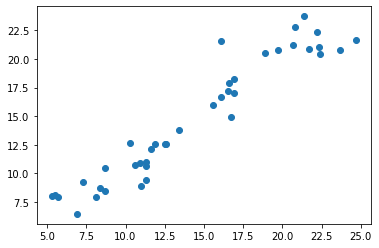

In [22]:
plt.scatter(ytest, ypred)
plt.show()

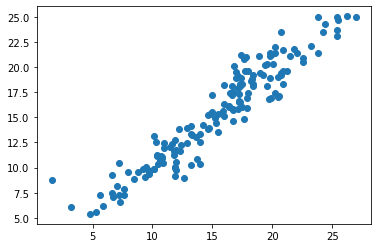

In [25]:
ypred_train = model.predict(xtrain)
plt.scatter(ytrain,ypred_train)
##plt.plot(ytrain,6.948 + 0.054 *ypred_train,'r')
plt.show()